In [237]:
import tiktoken

from collections import Counter

In [238]:
import torch

In [295]:
with open("../data/current_events_dataset.txt", "r") as f:
    current_events_text = f.read()

with open("../data/general_dataset.txt", "r") as f:
    general_text = f.read()

In [296]:
encoder = tiktoken.get_encoding("gpt2")

In [297]:
def safe_encode(text):
    return encoder.encode(text, disallowed_special=())

current_events_tokens = safe_encode(current_events_text)
general_tokens = safe_encode(general_text)

In [298]:
current_events_counts = Counter(current_events_tokens)
general_counts = Counter(general_tokens)

current_events_tokens_set = set(current_events_counts.keys())
general_tokens_set = set(general_counts.keys())

general_unique = general_tokens_set - current_events_tokens_set
current_events_unique = current_events_tokens_set - general_tokens_set

current_events_unique_counts = {
    token: count for token, count in current_events_counts.items() if token in current_events_unique
}

general_unique_counts = {
    token: count for token, count in general_counts.items() if token in general_unique
}

In [299]:
for token, count in sorted(general_unique_counts.items(), key=lambda x: x[1], reverse=True):
    print(encoder.decode([token]), token, count)

 ISIL 26854 19
 nightclub 26617 8
 bailout 29928 8
 ISIS 7768 7
 sells 16015 7
 Barack 8732 7
 Obama 2486 7
 OECD 33802 6
2017 5539 6
 art 1242 6
01 486 6
 church 4928 5
26 2075 5
 stamped 28305 5
 feet 3625 5
 starts 4940 5
 Hemisphere 42811 5
 sovereign 18901 5
 Stability 47865 5
 Anton 9261 4
 Ex 1475 4
ming 2229 4
 Lisbon 41898 4
che 2395 4
 Brussels 16445 4
ica 3970 4
 Turnbull 26445 4
 ballot 11100 4
ille 8270 4
 sinks 38614 4
08 2919 4
 apartment 7962 4
 sar 29008 4
 snow 6729 4
 fans 3296 4
 Revolution 9303 4
 territories 16771 4
 newspaper 7533 4
nian 44516 4
� 237 4
 Orbit 38161 4
14 1415 4
 mobile 5175 4
 effectively 6840 4
 Tunisia 33972 4
 hostage 23229 4
 Abbott 16988 4
 Bo 3248 4
 split 6626 4
 Boston 6182 4
 Rudd 36131 4
 Gill 12981 4
 debt 5057 4
eman 8463 3
 Perth 29913 3
que 4188 3
 agent 5797 3
 limits 7095 3
 102 15143 3
 participate 8277 3
 organized 8389 3
species 35448 3
 Mü 40790 3
 van 5719 3
 allegedly 7910 3
 Mario 10682 3
 immediately 3393 3
 extend 9117 3


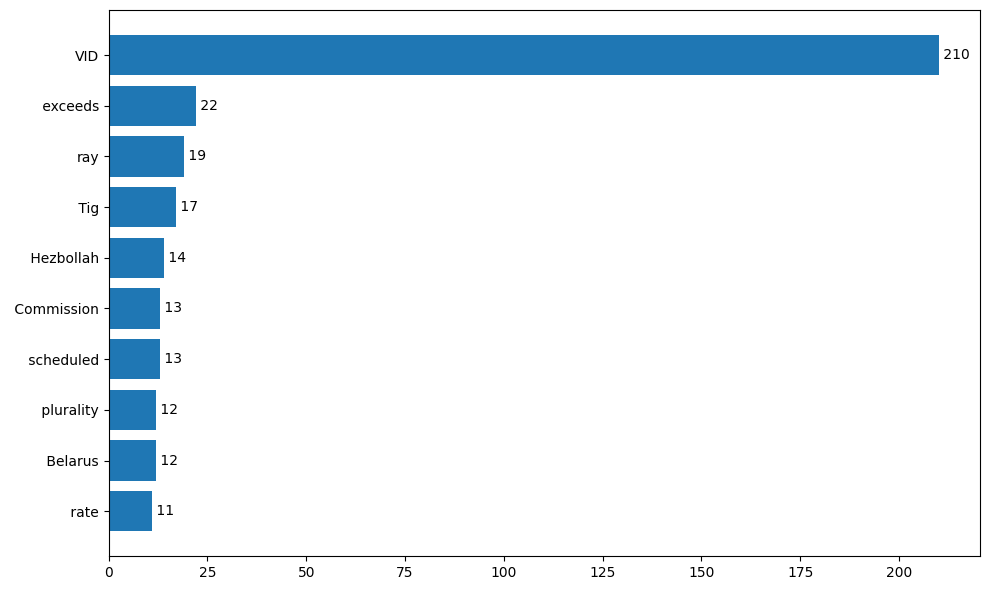

In [300]:
import matplotlib.pyplot as plt

# Get top 5 tokens and counts
top_5_tokens = sorted(current_events_unique_counts.items(), key=lambda x: x[1], reverse=True)[:10]
tokens = [encoder.decode([token]) for token, _ in top_5_tokens][::-1]  # Reverse the order
counts = [count for _, count in top_5_tokens][::-1]  # Reverse the order

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(tokens, counts)

# Add value labels on the bars
for i, count in enumerate(counts):
    plt.text(count, i, f' {count}', va='center')

plt.tight_layout()
plt.show()

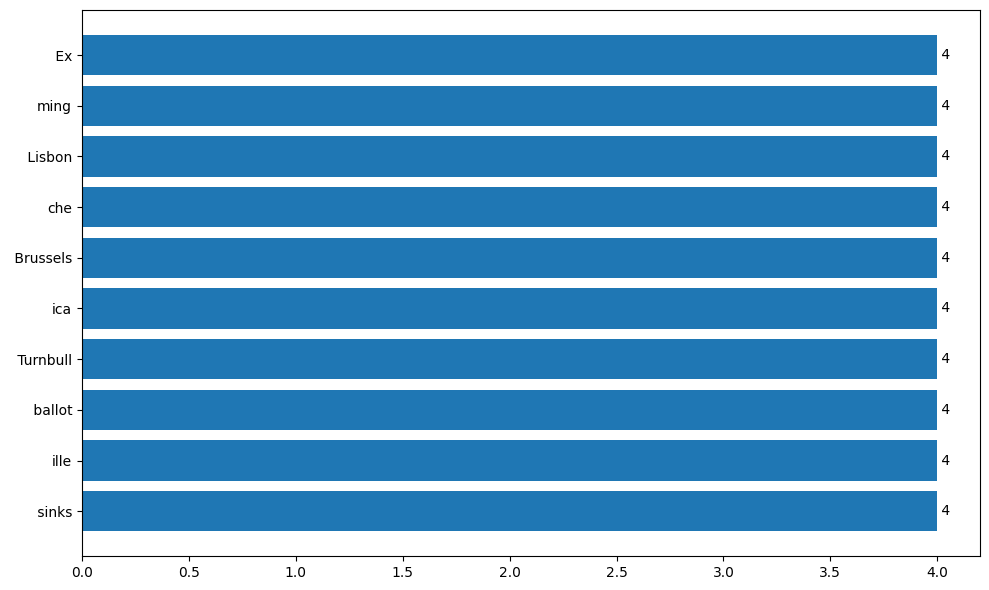

In [301]:
import matplotlib.pyplot as plt

# Get top 5 tokens and counts
top_5_tokens = sorted(general_unique_counts.items(), key=lambda x: x[1], reverse=True)[20:30]
tokens = [encoder.decode([token]) for token, _ in top_5_tokens][::-1]  # Reverse the order
counts = [count for _, count in top_5_tokens][::-1]  # Reverse the order

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(tokens, counts)

# Add value labels on the bars
for i, count in enumerate(counts):
    plt.text(count, i, f' {count}', va='center')

plt.tight_layout()
plt.show()

In [302]:
sorted_current_events_counts = sorted(current_events_unique_counts.items(), key=lambda x: x[1], reverse=True)

total_freq = 0
selected_current_events_tokens = {}

for token, count in sorted_current_events_counts:
    if total_freq + count <= 20000:
        selected_current_events_tokens[token] = count
        total_freq += count
    else:
        break

print(f"Total frequency: {total_freq} \n")

Total frequency: 6828 



In [303]:
x = []
y = []

i = 512

while i <= len(current_events_tokens):
    if current_events_tokens[i] in selected_current_events_tokens.keys():
        context = current_events_tokens[i - 512 : i]
        target = current_events_tokens[i]
        x.append(context)
        y.append(target)
        i += 128
    else:
        i += 1


In [304]:
print(len(y))

380


In [305]:
x_current_events = torch.tensor(x[:200], dtype=torch.long)
y_current_events = torch.tensor(y[:200], dtype=torch.long)

print(x_current_events.shape, y_current_events.shape)

torch.save({
    'context': x_current_events,
    'target': y_current_events
}, 'current_events_eval.pt')

torch.Size([200, 512]) torch.Size([200])


In [306]:
sorted_general_counts = sorted(general_unique_counts.items(), key=lambda x: x[1], reverse=True)

total_freq = 0
selected_general_tokens = {}

for token, count in sorted_general_counts:
    if total_freq + count <= 20000:
        selected_general_tokens[token] = count
        total_freq += count
    else:
        break

print(f"Total frequency: {total_freq} \n")

Total frequency: 3260 



In [307]:
x = []
y = []

i = 512

while i <= len(general_tokens):
    if general_tokens[i] in selected_general_tokens.keys():
        context = general_tokens[i - 512 : i]
        target = general_tokens[i]
        x.append(context)
        y.append(target)
        i += 128
    else:
        i += 1


In [308]:
print(len(y))

225


In [309]:
x_general = torch.tensor(x[:200], dtype=torch.long)
y_general = torch.tensor(y[:200], dtype=torch.long)

print(x_general.shape, y_general.shape)

torch.save({
    'context': x_general,
    'target': y_general
}, 'general_eval.pt')

torch.Size([200, 512]) torch.Size([200])
